#### Notebook config

In [1]:
import numpy as np
from plotea import *

##### Dynamic rc settings

In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif' #'arial' (see ./matplotlib2d.ipynb)
mpl.rcParams['font.size'] = 20

# Introduction

The `plotea` package works in tandem with `arrau` to which it outsources all the other array operations such as slicing, extracting, normalisation, DFT and others. Below are figure-formatting guidelines of some high-impact journals that have helped design this package.

## Formatting guidelines

### Nature Geoscience

Source: https://www.nature.com/ngeo/for-authors/preparing-your-submission

    Figures should be numbered separately with Arabic numerals in the order of occurrence in the text of the manuscript. One- or two-column format figures are preferred. When appropriate, figures should include error bars. A description of the statistical treatment of error analysis should be included in the figure or scheme legend.

    Figure lettering should be in a clear, **sans-serif** typeface (for example, `Helvetica`); if possible, the same typeface in approximately the **same font size** should be used for all figures in a paper. Use symbol font for Greek letters. **All display items should be on a white background**, and should avoid excessive boxing, unnecessary colour, spurious decorative effects (such as three-dimensional 'skyscraper' histograms) and highly pixelated computer drawings. The vertical axis of histograms should not be truncated to exaggerate small differences. Labelling must be of sufficient size and contrast to be readable, even after appropriate reduction. The **thinnest lines in the final figure should be no smaller than one point wide**. Reasonable requests to enlarge figures will be considered, but editors will make the final decision on figure size. Authors will see a proof of figures.

    Figures divided into parts should be labelled with a **lower-case bold a, b, and so on, in the same type size as used elsewhere in the figure**. Lettering in figures should be in lower-case type, with **only the first letter of each label capitalized**. **Units should have a single space between the number and the unit**, and follow SI nomenclature (for example, ms rather than msec) or the nomenclature common to a particular field. **Thousands should be separated by commas (1,000)**. Unusual units or abbreviations should be spelled out in full or defined in the legend. Scale bars should be used rather than magnification factors, with the length of the bar defined in the legend rather than on the bar itself. In legends, please use visual cues rather than verbal explanations, such as "open red triangles".

    Unnecessary figures should be avoided: data presented in small tables or histograms, for instance, can generally be stated briefly in the text instead. **Figures should not contain more than one panel unless the parts are logically connected**; each panel of a multipart figure should be sized so that the whole figure can be reduced by the same amount and reproduced on the printed page at the smallest size at which essential details are visible.

    Authors are encouraged to consider the needs of colour-blind readers (a substantial minority of the male population) when choosing colours for figures. Many colour-blind readers cannot interpret visuals that rely on discrimination of green and red, for example. The **use of colour-safe combinations**, such as green and magenta, turquoise and red, yellow and blue or other accessible colour palettes is strongly encouraged. Please also **avoid the use of perceptually non-uniform colour scales, such as rainbows**. Further reading: The misuse of colour in science communication.

    When a manuscript is accepted for publication, we will ask for high-resolution figure files, possibly in a different electronic format. This information will be included in the acceptance letter. See below for details of digital image production and submission.

# Getting started

## Getting help

In [2]:
help(p2d)

Help on package p2d:

NAME
    p2d

DESCRIPTION
    Multi-layer 2d visualisations of 3d volumes, surfaces and point-clouds 
    for scientific publications.
    
    (c) Copywright 2019- Kajetan Chrapkiewicz.
    Ask for permission writing to k.chrapkiewicz17@imperial.ac.uk.

PACKAGE CONTENTS
    generic

FILE
    /home/kmc3817/software/plo2d/p2d/__init__.py




## Testing the installation

In [13]:
!python3 -m unittest discover plotea -v


----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


# Features overview

## Basic plots: 1d arrays

## Basic plots: 2d arrays

In [10]:
# data 
fname = 'downloaded/bt_kol01_shape341x361.mmp'
a = np.memmap(fname, dtype=np.float32, shape=(341,361))
# from arrau.a2d import Surf
# a = Surf(a, extent=[[8e3,25e3],[-3e3,15e3]]) # should be arrau independent

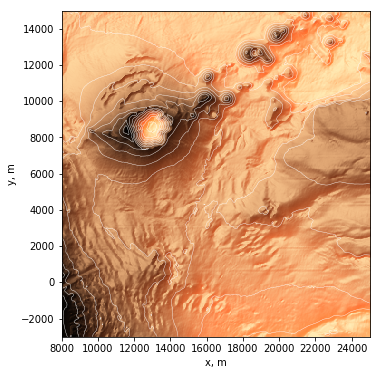

In [12]:
# plot 
figure(10,6)
a.plot(mode='shade', cmap='copper', alpha=1)
a.plot(mode='cr', colors='w')

## Basic plots: 3d arrays

### 3d plot: `volshow`

In [4]:
import ipyvolume as ipv
ipv.__version__

'0.5.2'

In [33]:
from plotea.ipyvolume import Ipv
# Ipv.volshow(a, controls=0, azimuth=0, elevation=90)

#### Latest `ipyvolume` version
Installed with conda. Change to pygmt kernel. Still can't change the aspect.

In [16]:
import ipyvolume as ipv
ipv.__version__

'0.6.0-alpha.8'

In [12]:
ipv.set_box_aspect

AttributeError: module 'ipyvolume' has no attribute 'set_box_aspect'

In [23]:
# help(ipv.pylab) # import set_box_aspect
# set_box_aspect((1, 0.5, 0.75))

'/home/kmc3817/.conda/envs/pygmt/lib/python3.6/site-packages/ipyvolume/__init__.py'

In [23]:
ipv.__file__

'/home/kmc3817/.conda/envs/pygmt/lib/python3.6/site-packages/ipyvolume/__init__.py'

### 2d slices

Another option is to slice the array (see `arrau.a3d`) and then proceed with plots of 2d arrays as in the previous section.

## Interactivity: widgets

In [4]:
from ipywidgets import (interactive, interact, interact_manual, fixed,
                        IntSlider, FloatSlider, BoundedIntText, Dropdown, 
                        SelectMultiple, Checkbox,
                        Layout, TwoByTwoLayout)

In [5]:
help(interact)

Help on _InteractFactory in module ipywidgets.widgets.interaction object:

class _InteractFactory(builtins.object)
 |  Factory for instances of :class:`interactive`.
 |  
 |  This class is needed to support options like::
 |  
 |      >>> @interact.options(manual=True)
 |      ... def greeting(text="World"):
 |      ...     print("Hello {}".format(text))
 |  
 |  Parameters
 |  ----------
 |  cls : class
 |      The subclass of :class:`interactive` to construct.
 |  options : dict
 |      A dict of options used to construct the interactive
 |      function. By default, this is returned by
 |      ``cls.default_options()``.
 |  kwargs : dict
 |      A dict of **kwargs to use for widgets.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, _InteractFactory__interact_f=None, **kwargs)
 |      Make the given function interactive by adding and displaying
 |      the corresponding :class:`interactive` widget.
 |      
 |      Expects the first argument to be a function. Parameters to this

### Basic

In [11]:
from plotea.widgets import *
i(greeting)

interactive(children=(Text(value='IPython Widgets', description='text'), Output()), _dom_classes=('widget-inte…

<function __main__.greeting(text='World')>

In [6]:

interact(greeting, text="IPython Widgets")

interactive(children=(Text(value='IPython Widgets', description='text'), Output()), _dom_classes=('widget-inte…

<function __main__.greeting(text='World')>

### Slicing through volumes

In [ ]:
p = i02
kwargs = dict(overwrite=0, vmin=1500, vmax=7000, cmap='twilight')
nx, ny, nz = p.dims
@interact(it=BoundedIntText(value=1, min=0, max=160, step=15),
          x=BoundedIntText(value=nx//2, min=0, max=nx, step=10),
          y=BoundedIntText(value=ny//2, min=0, max=ny, step=10),
          z=BoundedIntText(value=nz//2, min=0, max=nz, step=10))
def _(it, x, y, z):
    kwargs['x'] = x
    kwargs['y'] = y
    kwargs['z'] = z
    fig = plt.figure(figsize=(14,10))
    p.o.vp.it[it].plot_3slices(fig, **kwargs)

## Interactivity: scrolling

## Style: Jupyter themes

In [ ]:
# from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
# jtplot.style()

# Examples gallery

#### Example 1
Shading applied to model.

In [5]:
# data 
fname = 'downloaded/p14-StartVp_shape341x361x81.mmp'
a = np.memmap(fname, dtype=np.float32, shape=(341,361,81))
a = Arr3d(a, extent=[[8e3,25e3],[-3e3,15e3],[0,4e3]])
a.slice(13.25e3, axis=0, unit='m')
a.slice(8.75e3, axis=1, unit='m')
a.slice(2e3, axis=2, unit='m')

NameError: name 'Arr3d' is not defined

In [6]:
# plot 
figure(15,6)
a.slices.list[-1].plot(mode='shade', cmap='magma', vert_exag=0.5)
a.slices.list[-1].plot(mode='contour', xlabel='x, m') #, invert_vertical_axis=False)
# a.slices.list[-1].plot(mode='im+cr', levels=4)
a.slices.list[-1].plot_slice_lines()
plt.show()

AttributeError: 'memmap' object has no attribute 'slices'

<Figure size 1080x432 with 0 Axes>

#### Example 2
Shading applied to surface.

In [7]:
# data 
fname = 'downloaded/bt_kol01_shape341x361.mmp'
a = np.memmap(fname, dtype=np.float32, shape=(341,361))
a = Surf(a, extent=[[8e3,25e3],[-3e3,15e3]])
# a.slice(13.25e3, axis=0, unit='m')
# a.slice(8.75e3, axis=1, unit='m')
# a.slice(2e3, axis=2, unit='m')

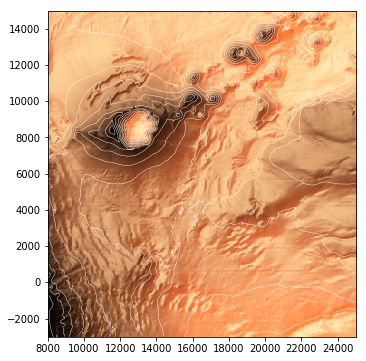

In [15]:
figure(10,6)
a.plot(mode='shade', cmap='copper', alpha=1)
a.plot(mode='cr', colors='w')

#### Example 3
Contourf + contour

In [8]:
# data 
fname = 'downloaded/p14-StartVp_shape341x361x81.mmp'
a = np.memmap(fname, dtype=np.float32, shape=(341,361,81))
a = Arr3d(a, extent=[[8e3,25e3],[-3e3,15e3],[0,4e3]])
a.slice(13.25e3, axis=0, unit='m')
a.slice(8.75e3, axis=1, unit='m')
a.slice(2e3, axis=2, unit='m')

NameError: name 'Arr3d' is not defined

In [9]:
# plot 
figure(15,6)
i = -1
# a.slices.list[i].plot()
# a.slices.list[i].plot(mode='shade', cmap='magma')
a.slices.list[i].plot(mode='contourf')
a.slices.list[i].plot(mode='contour', colors='w') #, invert_vertical_axis=False)
# a.slices.list[i].plot(mode='im+cr', levels=4)
a.slices.list[i].plot_slice_lines()
plt.show()

AttributeError: 'memmap' object has no attribute 'slices'

<Figure size 1080x432 with 0 Axes>

# ...